线性拟合斜率 k = 6.3707e-04 m/N
杨氏模量 E = 1.812e+11 Pa


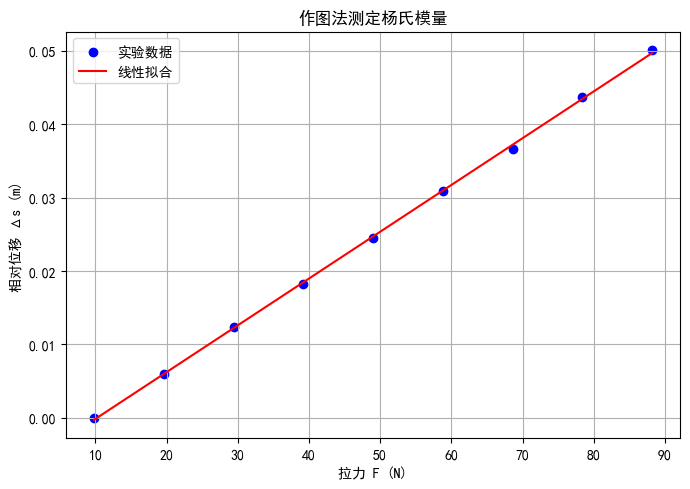

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'FangSong']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

# ------------------------------
# 实验数据
# ------------------------------
F = np.array([1,2,3,4,5,6,7,8,9]) * 9.8  # N, 砝码对应拉力
s = np.array([4.81,5.41,6.05,6.63,7.26,7.90,8.47,9.18,9.82])  # cm
s = s - s[0]  # 以第一次为零点，表示相对位移
s = s / 100.0  # 转为 m

# ------------------------------
# 线性拟合
# ------------------------------
coeff = np.polyfit(F, s, 1)
k = coeff[0]
fit_line = np.poly1d(coeff)
print(f"线性拟合斜率 k = {k:.4e} m/N")

# ------------------------------
# 根据斜率计算杨氏模量
# ------------------------------
L = 1.08770     # m
D = 1.34615     # m
b = 0.07667     # m
d = 6.49e-4     # m
E = (8 * L * D) / (np.pi * d**2 * b * k)
print(f"杨氏模量 E = {E:.3e} Pa")

# ------------------------------
# 绘图
# ------------------------------
plt.figure(figsize=(7,5))
plt.scatter(F, s, color='blue', label='实验数据')
plt.plot(F, fit_line(F), 'r-', label='线性拟合')
plt.xlabel('拉力 F (N)')
plt.ylabel('相对位移 Δs (m)')
plt.title('作图法测定杨氏模量')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
